 <font size="22"> Prediction on Diabetes Condition Using BMI, Blood Glucose, and Age</font> 

 <font size="5"> Group 31: Alton Ho, Ivy Feng, Jasmine Li, Marshal Shuai Zhang</font> 

 <font size="15">Introduction</font> 

Diabetes is a pervasive and debilitating metabolic disorder that has health implications, including cardiovascular diseases, kidney dysfunction, and vision problems. Early detection and proactive management are vital to curbing these effects. As of January 2022, nearly 463 million adults globally were living with diabetes, and this number was projected to reach 700 million by 2045. These staggering statistics emphasize the urgency of innovative approaches to combat this epidemic.

Our project focuses on predicting diabetes risk using parameters like BMI, age, blood pressure. Aiming to create a model that can identify potential diabetes cases, improving individuals' quality of life and reducing healthcare costs.

The ultimate question is: **Is the new patient likely to have diabetes based on their blood glucose, BMI, and age?**

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(dplyr) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

<font size="15">Preliminary exploratory data analysis</font> 

In [3]:
diabetes_data <- read_csv("https://raw.githubusercontent.com/altonho67/dsci-100-2023w1-group-31/main/data/diabetes_2.csv")
diabetes_data <- diabetes_data %>%
                 mutate(Outcome = as.factor(Outcome))|>
                 mutate(Outcome = fct_recode(Outcome, "Diabetes" = "1", "None" = "0")) |>
                 mutate_at(c('SkinThickness','Insulin','BloodPressure','Glucose'), ~na_if(., 0))

diabetes_split <- initial_split(diabetes_data, prop = 3/4, strata = Outcome)
diabetes_training <- training(diabetes_split)
diabetes_testing <- testing(diabetes_split)
head(diabetes_training)


Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,137,40,35,168,43.1,2.288,33,Diabetes
8,125,96,NA,NA,0.0,0.232,54,Diabetes
10,168,74,NA,NA,38.0,0.537,34,Diabetes
5,166,72,19,175,25.8,0.587,51,Diabetes
7,100,NA,NA,NA,30.0,0.484,32,Diabetes
0,118,84,47,230,45.8,0.551,31,Diabetes


In [6]:
diabetes_summary <- diabetes_training |>
                 group_by(Outcome) |>
                 summarize(min_Age = min(Age), max_Age = max(Age), mean_Age = mean(Age),
                           min_Insulin = min(Insulin), max_Insulin = max(Insulin), mean_Insulin = mean(Insulin),
                           min_SkinThickness = min(SkinThickness), max_SkinThickness = max(SkinThickness), mean_SkinThickness = mean(SkinThickness),
                           min_BMI = min(BMI), max_BMI = max(BMI), mean_BMI = mean(BMI),
                           min_BloodPressure = min(BloodPressure), max_BloodPressure = max(BloodPressure), mean_BloodPressure = mean(BloodPressure),
                           min_DiabetesPedigreeFunction = min(DiabetesPedigreeFunction), max_DiabetesPedigreeFunction = max(DiabetesPedigreeFunction), mean_DiabetesPedigreeFunction = mean(DiabetesPedigreeFunction),
                           n_of_patients = n())
diabetes_summary


Outcome,min_Age,max_Age,mean_Age,min_Insulin,max_Insulin,mean_Insulin,min_SkinThickness,max_SkinThickness,mean_SkinThickness,min_BMI,max_BMI,mean_BMI,min_BloodPressure,max_BloodPressure,mean_BloodPressure,min_DiabetesPedigreeFunction,max_DiabetesPedigreeFunction,mean_DiabetesPedigreeFunction,n_of_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
None,21,81,31.15733,NA,NA,NA,NA,NA,NA,0,52.3,30.07520,NA,NA,NA,0.084,2.329,0.4192667,375
Diabetes,21,70,37.06965,NA,NA,NA,NA,NA,NA,0,67.1,35.50249,NA,NA,NA,0.088,2.288,0.5593582,201


Warning message:
“Removed 277 rows containing missing values (`geom_point()`).”


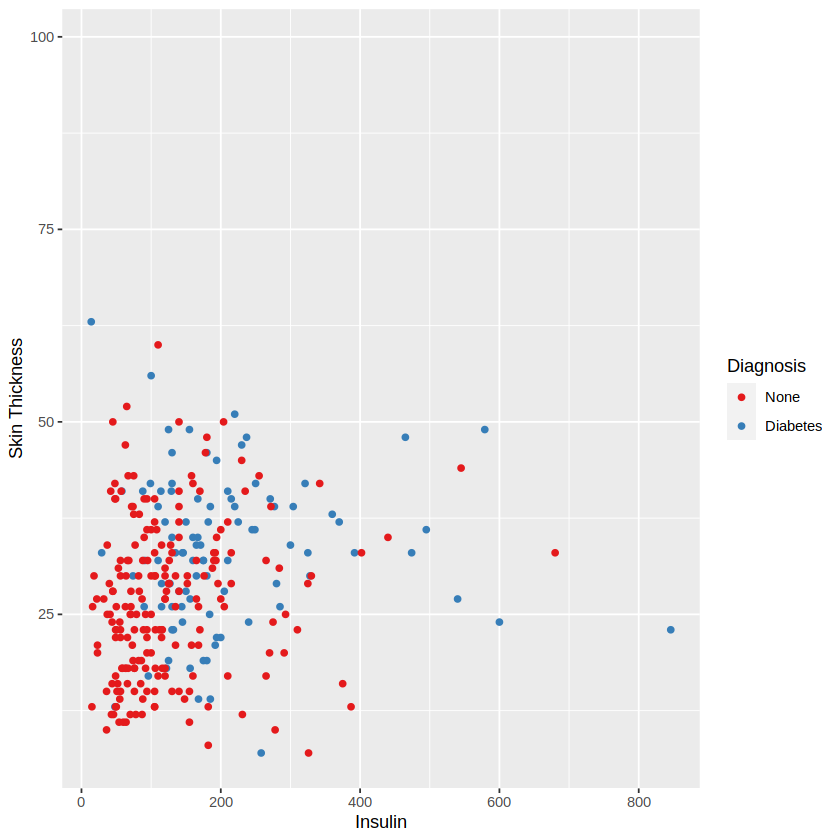

Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”


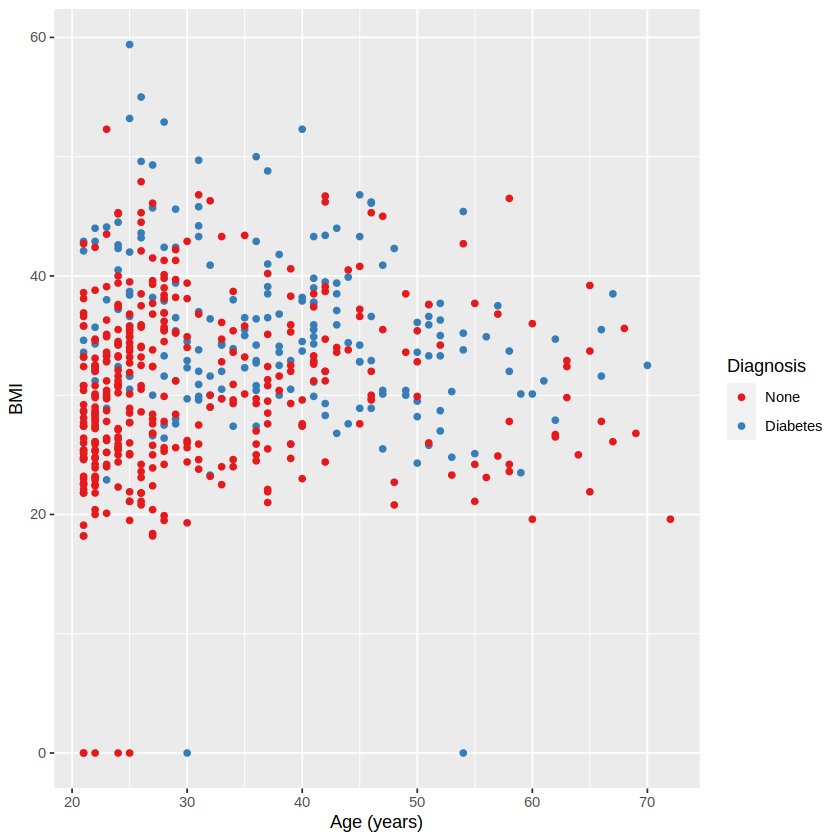

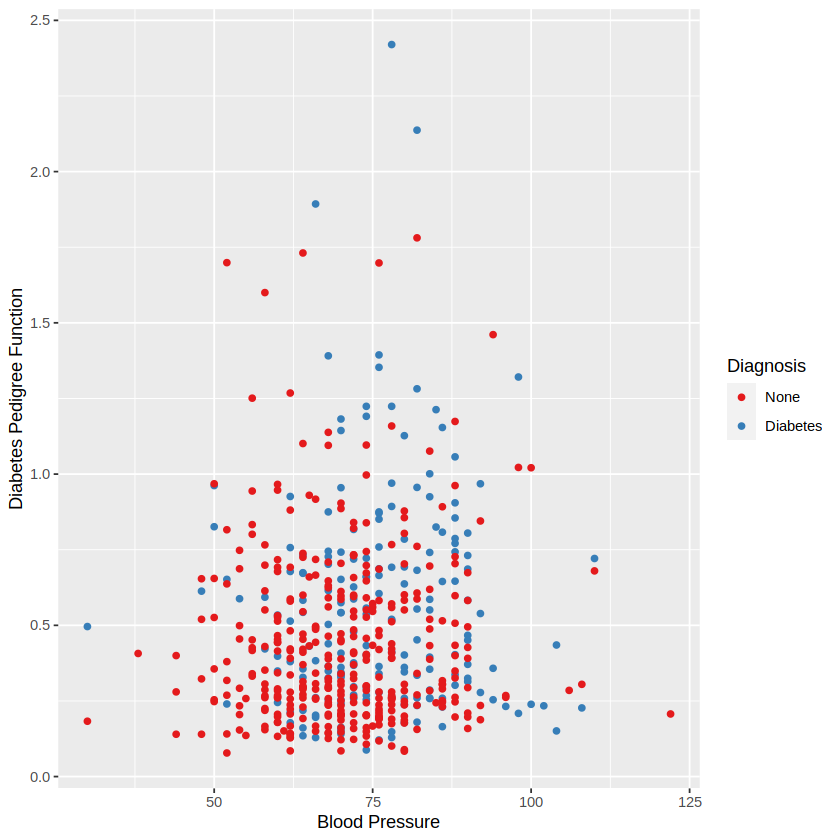

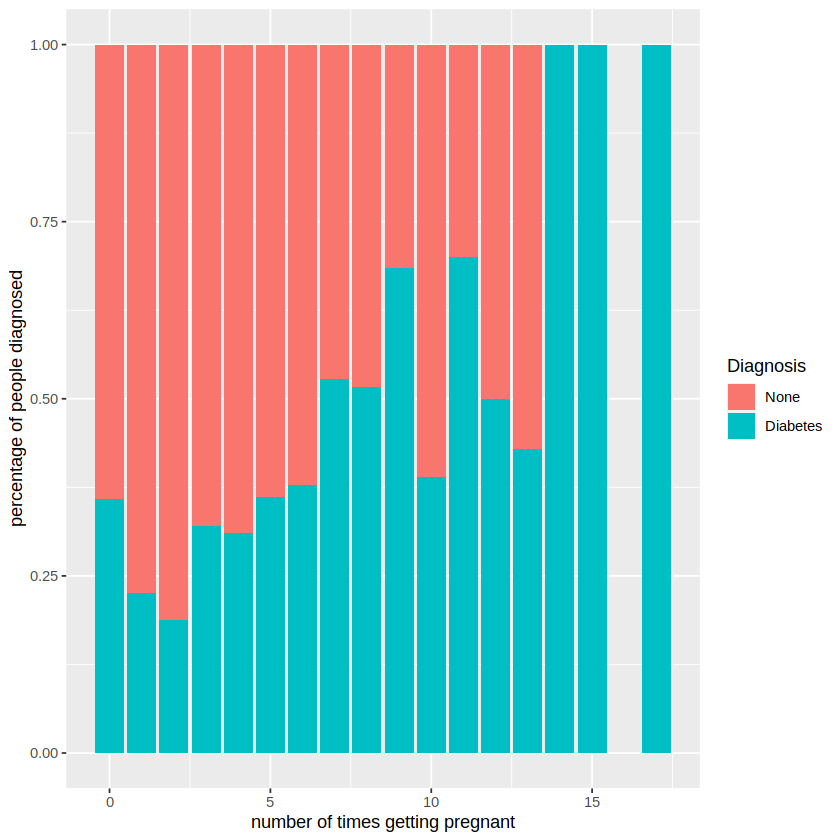

In [7]:
plot1 <- ggplot(diabetets_training, aes(x = Insulin, y = SkinThickness, color = Outcome)) +
                 geom_point() +
                 labs(x = "Insulin", y = "Skin Thickness", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(diabetets_training, aes(x = Age, y = BMI, color = Outcome)) +
                 geom_point() +
                 labs(x = "Age (years)", y = "BMI", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(diabetets_training, aes(x = BloodPressure, y = DiabetesPedigreeFunction, color = Outcome)) +
                 geom_point() +
                 labs(x = "Blood Pressure", y = "Diabetes Pedigree Function", color = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")
plot4 <- ggplot(diabetets_training, aes(x = Pregnancies, fill = Outcome,na.rm=TRUE)) +
                 geom_bar(position="fill") +
                 labs(x = "number of times getting pregnant", y = "percentage of people diagnosed", fill = "Diagnosis") +
                 scale_color_brewer(palette = "Set1")


plot1
plot2
plot3
plot4

<font size="35"> Methods </font> 

Our group discovered the diabetes dataset on Kaggle at this link https://www.kaggle.com/datasets/mathchi/diabetes-data-set. We downloaded it in CSV format and imported the dataset into our project using the read_csv function in R after uploading it to Github. The original owners of this dataset are the National Institute of Diabetes and Digestive and Kidney Diseases, provided by Vincent Sigillito (vgs@aplcen.apl.jhu.edu) from The Johns Hopkins University. All patients in the dataset are females at least 21 years old of Pima Indian heritage.

The columns and their meaning: 
- **Pregnancies** represent the number of times an individual has been pregnant. 
- **Glucose** represents plasma glucose concentration for 2 hours in an oral glucose tolerance test. 
- **Blood Pressure** is ​​Diastolic blood pressure measurement (mm Hg). 
- **Skin thickness** measures the Triceps skin fold thickness (mm).
- **Insulin** indicates 2-Hour serum insulin (mu U/ml). 
- **BMI(Body Mass Index)** gives weight in kg/(height in m)², an indicator of a person’s fitness and health level. 
- **Diabetes pedigree function (DPF)** calculates diabetes likelihood depending on the subject's age and his/her diabetic family history. 
- **Age** is the person’s age. 

To clean the diabetes prediction dataframe, we transformed the **outcome** into a categorical variable using the as_factor function. The author assigned the value 1 to indicate a confirmed diabetes condition and 0 to denote the absence of a diabetes condition. Instead we the fct_recode function to make them humanly readable. Additionally, we replaced the missing values that were represented as 0 in certain columns with 'NA'.


Subsequently, we employed the initial_split function to partition the data into testing (25%) and training (75%) groups, and used the head function to display a small sample of the table.


The three graphs represent different combinations of indicators used to predict an individual's likelihood of being diagnosed with diabetes. We compared various factors against each other to determine which predictors would be included in the final version of the project

We have decided to use **age**, **BMI**, and blood **glucose** level as our predictor



<font size="35"> Expected Outcomes and Significance </font> 


We expect that individuals with higher age, elevated BMI, and increased blood glucose levels are more likely to be diagnosed with diabetes.

This is significant for identifying the key factors behind diabetes. Understanding this can help detect symptoms at an early stage and provide timely intervention. If BMI is determined to be the primary risk factor, individuals with BMI levels outside the normal range may need to consider engaging in regular physical activity to prevent diabetes.

Future questions this could lead to:

- Why do these factors have such a large impact on the probability of developing diabetes?
- What measures can today’s society take to reduce the number of people suffering from this condition?

